### 2D prediction using StarDist

Libraries

In [1]:
import sys
import numpy as np
import matplotlib
matplotlib.rcParams["image.interpolation"] = 'none'
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

from glob import glob
import nibabel as nib
from csbdeep.utils import Path, normalize
from csbdeep.io import save_tiff_imagej_compatible

from stardist import random_label_cmap, _draw_polygons, export_imagej_rois
from stardist.models import StarDist2D

np.random.seed(6)
lbl_cmap = random_label_cmap()

Data

In [2]:
X_names = sorted(glob('../data/Gr4/RawImages/Nuclei/*.nii.gz'))
X = list(map(nib.load, X_names))
X = [x.get_fdata() for x in X]

In [3]:
StarDist2D.from_pretrained()

There are 4 registered models for 'StarDist2D':

Name                  Alias(es)
────                  ─────────
'2D_versatile_fluo'   'Versatile (fluorescent nuclei)'
'2D_versatile_he'     'Versatile (H&E nuclei)'
'2D_paper_dsb2018'    'DSB 2018 (from StarDist 2D paper)'
'2D_demo'             None


### Demo model

In [4]:
model = StarDist2D.from_pretrained('2D_demo')

Found model '2D_demo' for 'StarDist2D'.
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.486166, nms_thresh=0.5.


In [6]:
import cv2
idx = 2
img = X[idx][:, :, 270, 0].astype(np.uint8)
print(img.shape)

cv2.imshow('image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

(1024, 1024)


error: OpenCV(4.10.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1301: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvShowImage'


In [7]:
idx = 2
img = X[idx][:, :, 270, 0].astype(np.uint8)
img = normalize(img, 1,99.8, axis=(0,1))
labels, details = model.predict_instances(img)

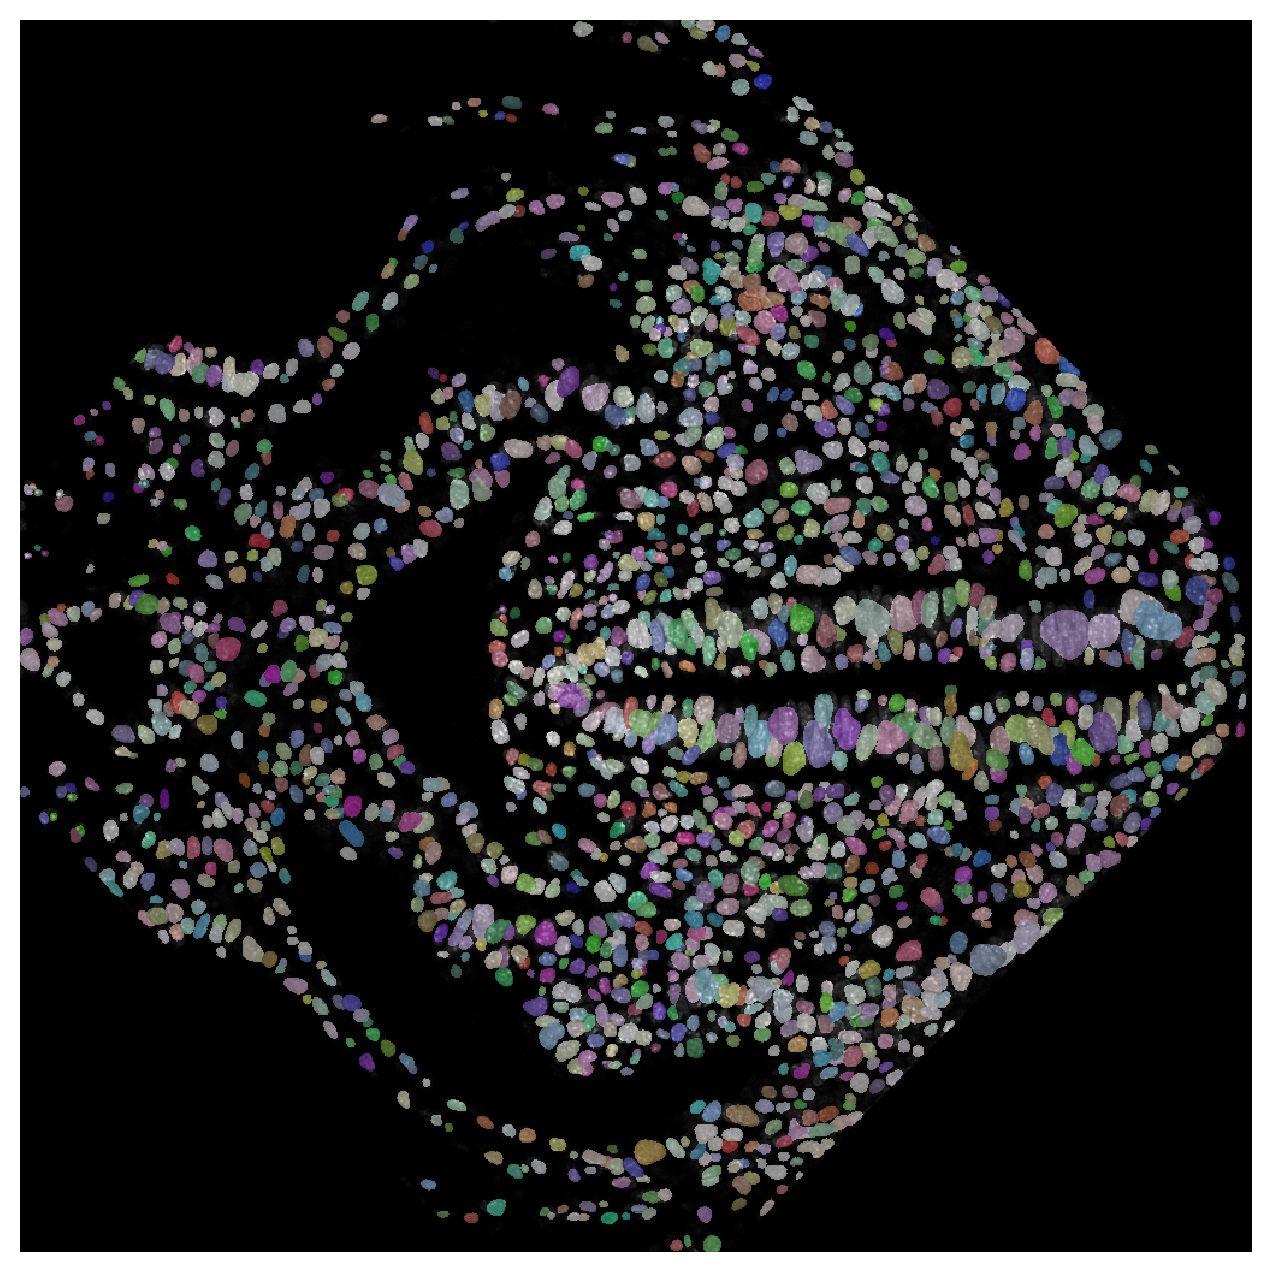

In [8]:
plt.figure(figsize=(8, 8))
plt.imshow(img, cmap='gray')
plt.imshow(labels, cmap=lbl_cmap, alpha=0.5)
plt.axis('off');

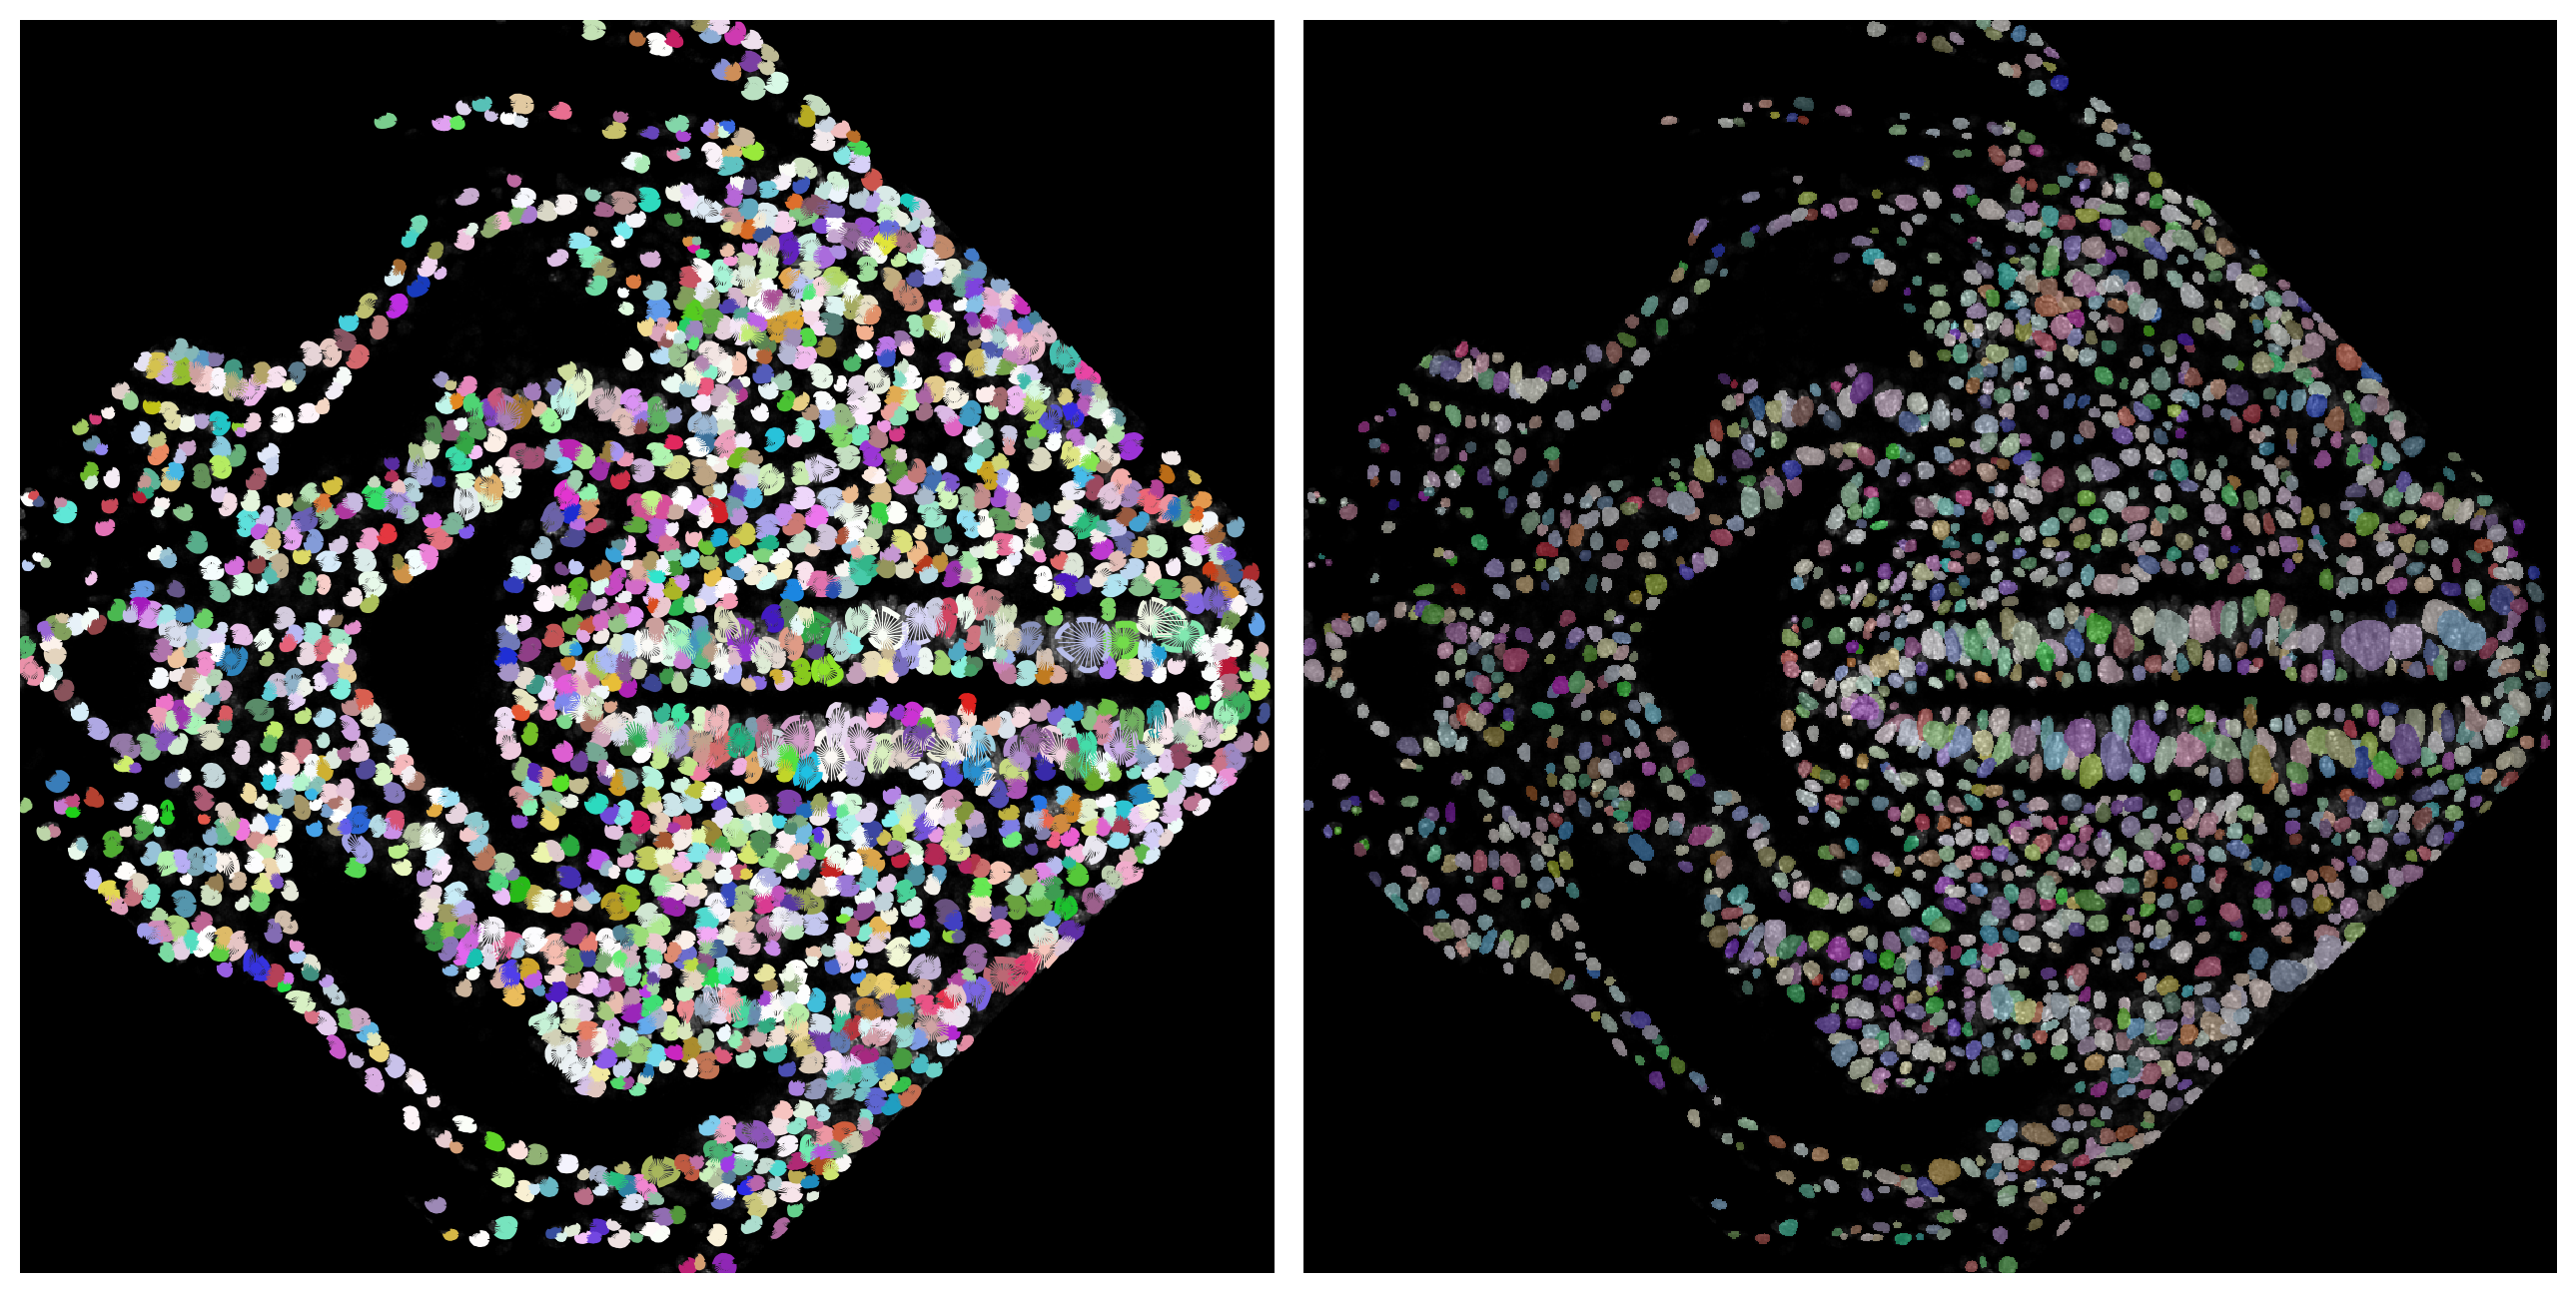

In [22]:
def example(model, i, show_dist=True):
    img = X[i][:, :, 270, 0].astype(np.uint8)
    img = normalize(img, 1,99.8, axis=(0,1))
    labels, details = model.predict_instances(img)

    plt.figure(figsize=(13,10))
    img_show = img if img.ndim==2 else img[...,0]
    coord, points, prob = details['coord'], details['points'], details['prob']
    plt.subplot(121); plt.imshow(img_show, cmap='gray'); plt.axis('off')
    a = plt.axis()
    _draw_polygons(coord, points, prob, show_dist=show_dist)
    plt.axis(a)
    plt.subplot(122); plt.imshow(img_show, cmap='gray'); plt.axis('off')
    plt.imshow(labels, cmap=lbl_cmap, alpha=0.5)
    plt.tight_layout()
    plt.show()
    
example(model, idx)

### Model from paper

In [19]:
model_paper = StarDist2D.from_pretrained('2D_paper_dsb2018')

Found model '2D_paper_dsb2018' for 'StarDist2D'.
5231396/5231396 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Loading network weights from 'weights_last.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.417819, nms_thresh=0.5.


In [ ]:
# example(model_paper, idx)

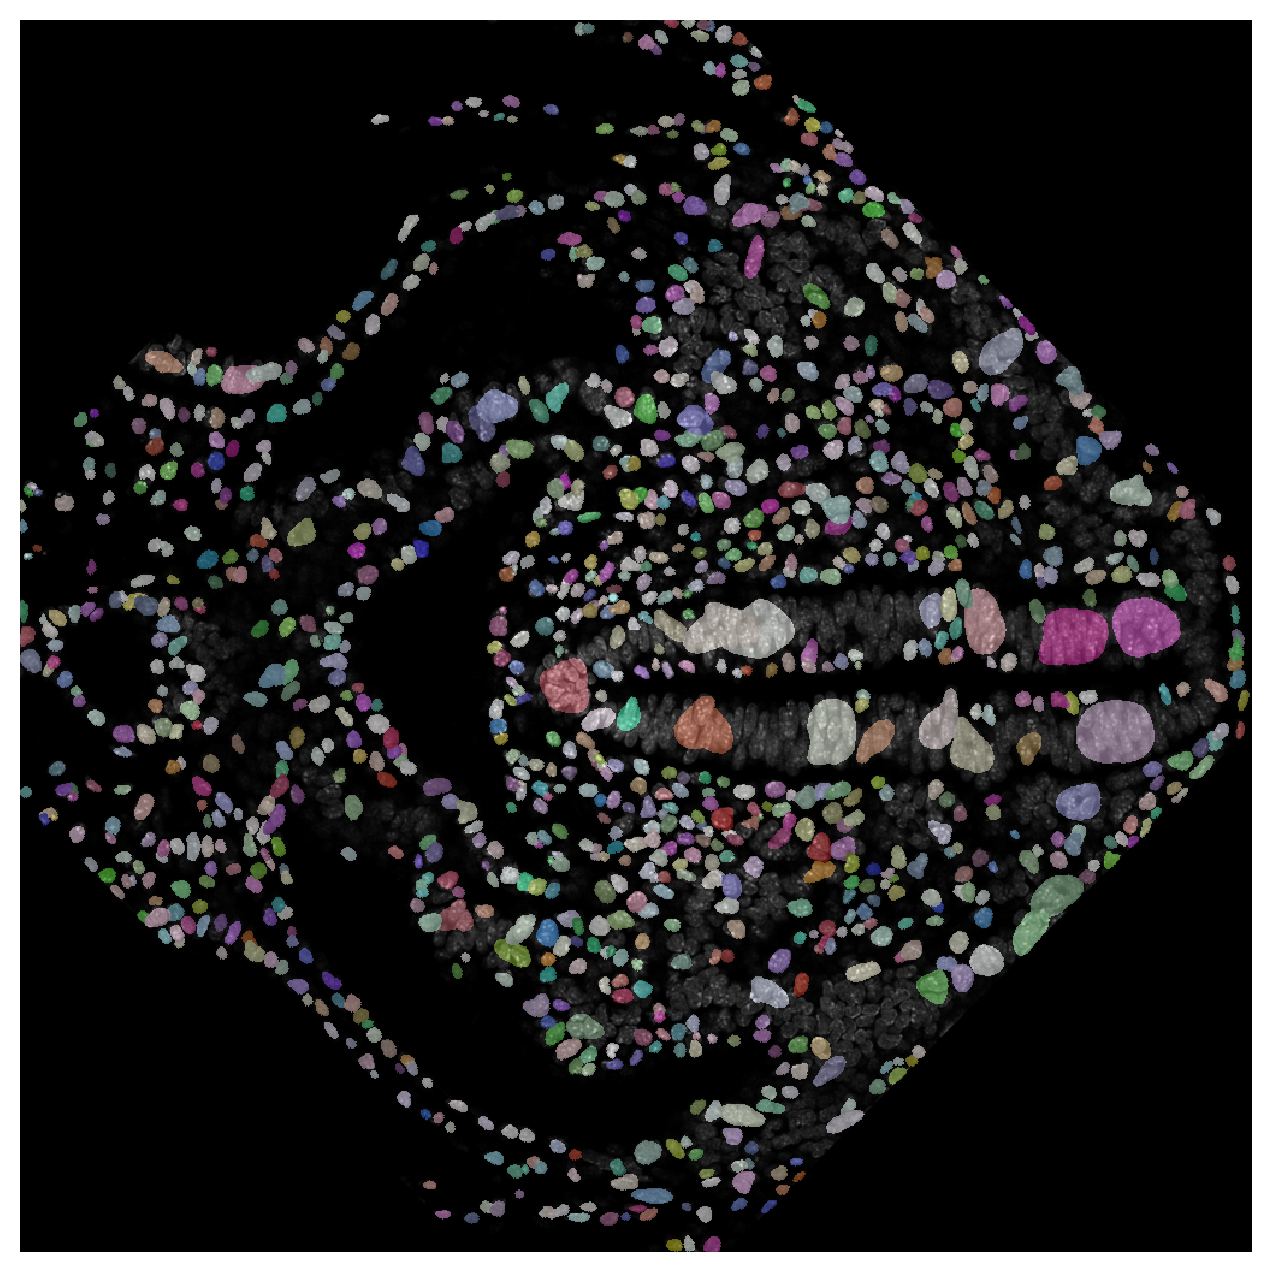

In [23]:
labels, details = model_paper.predict_instances(img)

plt.figure(figsize=(8, 8))
plt.imshow(img, cmap='gray')
plt.imshow(labels, cmap=lbl_cmap, alpha=0.5)
plt.axis('off');

Versatile fluo model

In [24]:
model_vers = StarDist2D.from_pretrained('2D_versatile_fluo')

Found model '2D_versatile_fluo' for 'StarDist2D'.
5320433/5320433 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step
Loading network weights from 'weights_best.h5'.
Loading thresholds from 'thresholds.json'.
Using default values: prob_thresh=0.479071, nms_thresh=0.3.


In [ ]:
# example(model_paper, idx)

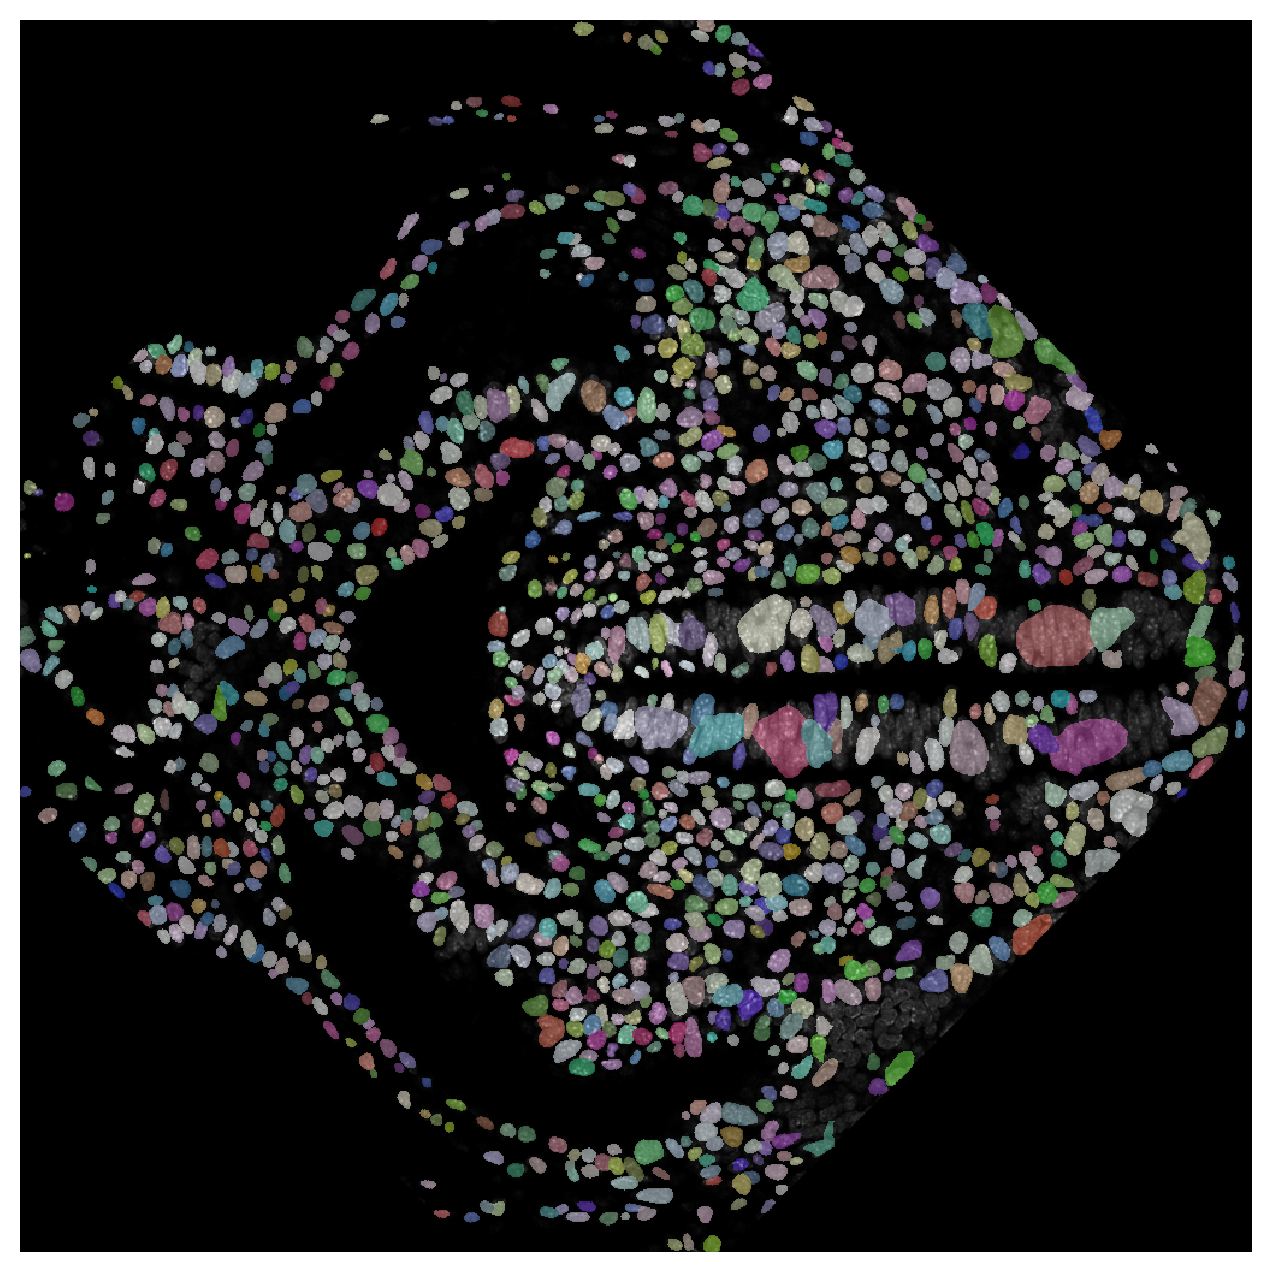

In [26]:
labels, details = model_vers.predict_instances(img)

plt.figure(figsize=(8, 8))
plt.imshow(img, cmap='gray')
plt.imshow(labels, cmap=lbl_cmap, alpha=0.5)
plt.axis('off');